## 자동차 등록 대수 현황에 따른 예측

In [2]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('jeju_car_sign.csv', encoding='cp949')
dataset.head()

,시점,승용(서귀포),승용(제주),승합(서귀포),승합(제주),총계(서귀포),총계(제주)
0,2014.06,47231,172785,3791,10510,74905,223978
1,2014.07,47506,175424,3794,10537,75274,226867
2,2014.08,47730,176824,3791,10523,75562,228372
3,2014.09,47964,178019,3786,10527,75829,229691
4,2014.10,48233,179463,3782,10492,76187,231234


In [7]:
dataset['총계(제주도)'] = dataset['총계(서귀포)'] + dataset['총계(제주)']

Text(0, 0.5, 'car')

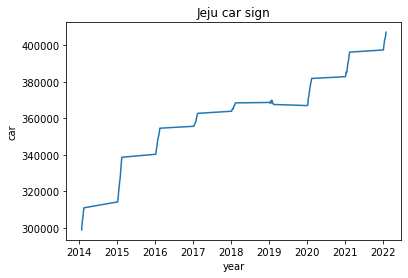

In [14]:
import matplotlib.pyplot as plt

X = dataset['시점']
y = dataset['총계(제주도)']

plt.plot(X,y)
plt.title('Jeju car sign')
plt.xlabel('year')
plt.ylabel('car')

## 제주도 인구비율 증감 그래프

In [17]:
dataset_1 = pd.read_csv('jeju_population.csv', encoding='cp949')
dataset_1.head()

,시점,전국,제주특별자치도
0,2000,47732558,542368
1,2001,48021543,546889
2,2002,48229948,550831
3,2003,48386823,552297
4,2004,48583805,555362


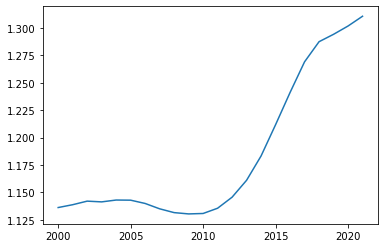

In [18]:
dataset_1['제주도인구비율'] = (dataset_1['제주특별자치도'] / dataset_1['전국'])*100

X1 = dataset_1['시점']
y1 = dataset_1['제주도인구비율']

plt.plot(X1,y1)

## 제주도 대중교통이용목적현황

In [24]:
dataset2 = pd.read_csv('Jeju_transportation_purpose.csv', encoding='cp949')
dataset2

,항목,2014,2015,2016,2017,2018,2019,2020,2021
0,출퇴근,24.2,22.2,16.0,13.4,15.1,15.5,20.2,18.1
1,등하교,39.5,32.8,20.0,25.8,29.3,14.5,12.3,17.5
2,업무,12.8,11.0,7.0,6.0,10.7,12.1,12.5,11.2
3,쇼핑,22.3,37.1,18.1,16.5,17.2,21.3,20.0,19.2
4,여가,40.0,56.0,28.8,28.3,16.1,26.6,32.4,31.3
5,학원,3.7,2.8,2.2,2.7,3.1,2.2,1.7,1.8
6,기타,15.7,15.3,8.0,7.2,8.5,7.7,0.9,0.9


In [36]:
def draw_color_cell(x,color):
    color = f'background-color:{color}'
    return color
 
dataset2.style.applymap(draw_color_cell,color='#ff9090',subset=pd.IndexSlice[4,:])
pd.options.display.float_format = '{:.2f}'.format

,항목,2014,2015,2016,2017,2018,2019,2020,2021
0,출퇴근,24.200000,22.200000,16.000000,13.400000,15.100000,15.500000,20.200000,18.100000
1,등하교,39.500000,32.800000,20.000000,25.800000,29.300000,14.500000,12.300000,17.500000
2,업무,12.800000,11.000000,7.000000,6.000000,10.700000,12.100000,12.500000,11.200000
3,쇼핑,22.300000,37.100000,18.100000,16.500000,17.200000,21.300000,20.000000,19.200000
4,여가,40.000000,56.000000,28.800000,28.300000,16.100000,26.600000,32.400000,31.300000
5,학원,3.700000,2.800000,2.200000,2.700000,3.100000,2.200000,1.700000,1.800000
6,기타,15.700000,15.300000,8.000000,7.200000,8.500000,7.700000,0.900000,0.900000


In [37]:
dataset2

,항목,2014,2015,2016,2017,2018,2019,2020,2021
0,출퇴근,24.20,22.20,16.00,13.40,15.10,15.50,20.20,18.10
1,등하교,39.50,32.80,20.00,25.80,29.30,14.50,12.30,17.50
2,업무,12.80,11.00,7.00,6.00,10.70,12.10,12.50,11.20
3,쇼핑,22.30,37.10,18.10,16.50,17.20,21.30,20.00,19.20
4,여가,40.00,56.00,28.80,28.30,16.10,26.60,32.40,31.30
5,학원,3.70,2.80,2.20,2.70,3.10,2.20,1.70,1.80
6,기타,15.70,15.30,8.00,7.20,8.50,7.70,0.90,0.90


## 제주도 렌트카

In [40]:
dataset3= pd.read_csv('2020_jeju_rentcar.csv', encoding='cp949')
dataset3.head()

,VHCLE_NM,VHCLE_TY_NM,VHCLE_FUEL_NM,VHCLE_GEBX_NM,VHCLE_NMPR_CO,VHCLE_MAKR_NM,USER_AGRDE_CODE,USER_SEXDSTN_CODE,USER_BRTC_CODE,CONECT_DEVICE_NM,RESVE_DT,USE_BEGIN_DT,USE_END_DT,USE_TIME_CO,RESVE_VHCLE_CO,SETLE_MN_NM,TOT_AMOUNT
0,K5 / LPG,중형,LPG,오토,5,기아,NaN,NaN,NaN,MOBILE,2020-01-01 오전 12:00:03,2020-01-02 오후 2:00:00,2020-01-03 오후 2:00:00,24,1,카드,42000
1,코나 / 휘발유,SUV/승합,휘발유,오토,5,현대,NaN,NaN,NaN,MOBILE,2020-01-01 오전 12:03:13,2020-01-04 오전 10:00:00,2020-01-05 오후 3:00:00,29,1,카드,54600
2,아반떼 AD / 휘발유,중형,휘발유,오토,5,현대,NaN,NaN,NaN,MOBILE,2020-01-01 오전 1:29:59,2020-01-17 오후 2:00:00,2020-01-20 오전 9:00:00,67,1,카드,53500
3,K5 2세대 / LPG,중형,LPG,오토,5,기아,NaN,NaN,NaN,MOBILE,2020-01-01 오전 3:24:43,2020-01-02 오전 10:00:00,2020-01-04 오후 8:00:00,58,1,카드,182700
4,쏘나타 뉴 라이즈 / LPG,중형,LPG,오토,5,현대,NaN,NaN,NaN,MOBILE,2020-01-01 오전 5:07:11,2020-01-05 오후 12:00:00,2020-01-08 오후 4:00:00,76,1,카드,88000


- 필요없는 칼럼 없애기

In [49]:
dataset3 = dataset3[['VHCLE_TY_NM', 'VHCLE_FUEL_NM','VHCLE_MAKR_NM', 'TOT_AMOUNT']]
dataset3.dropna(subset='VHCLE_FUEL_NM', axis=0, inplace=True)
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37042 entries, 0 to 37043
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   VHCLE_TY_NM    37042 non-null  object
 1   VHCLE_FUEL_NM  37042 non-null  object
 2   VHCLE_MAKR_NM  37042 non-null  object
 3   TOT_AMOUNT     37042 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


In [50]:
dataset3.head()

,VHCLE_TY_NM,VHCLE_FUEL_NM,VHCLE_MAKR_NM,TOT_AMOUNT
0,중형,LPG,기아,42000
1,SUV/승합,휘발유,현대,54600
2,중형,휘발유,현대,53500
3,중형,LPG,기아,182700
4,중형,LPG,현대,88000
